Engineering is the use of scientific principles to design and build machines, structures, and other items, including bridges, tunnels, roads, vehicles, and buildings. The discipline of engineering encompasses a broad range of more specialized fields of engineering, each with a more specific emphasis on particular areas of applied mathematics, applied science, and types of application. Engineering is a broad discipline that is often broken down into several sub-disciplines. Although an engineer will usually be trained in a specific discipline, he or she may become multi-disciplined through experience. Engineering is often characterized as having four main branches: chemical engineering, civil engineering, electrical engineering, and mechanical engineering. A relevant question is what determines the salary and the jobs these engineers are offered right after graduation. Various factors such as college grades, candidate skills, the proximity of the college to industrial hubs, the specialization one has, and market conditions for specific industries determine this. On the basis of these various factors, the objective is to determine the salary of an engineering graduate in India. 

Imports we will need:

In [168]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from IPython import display

Read in our csv into a dataframe:

In [169]:
df = pd.read_csv('https://raw.githubusercontent.com/MathewKatz/SPS_Python/main/Engineering_graduate_salary.csv')

Look at the first few rows of the dataframe to get a general idea:

In [170]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


Size of dataframe:

In [171]:
df.shape

(2998, 34)

Any nulls in dataframe?

In [172]:
df.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

No. Let's now take a look at the columns:

In [173]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

There are some columns that obviously do not affect salaries like ‘ID’ , ‘DOB’, boards of 10th and 12th and so on. We will get rid of these redundant columns.



In [174]:
df = df.drop(['ID', 'DOB', 'CollegeID', '12graduation' ,'GraduationYear','10board', '12board' , 'CollegeState','CollegeCityID', 'CollegeCityTier',],axis = 1)

Check for duplicates in our data.

In [175]:
df.duplicated().sum()

0

Curious to look at the different specialities:

In [176]:
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
information science engineering                 18
electronics and instrumentation engineering     18
instrumentation and control engineering         18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and automation      

Remove specialties lower than 10 people:

In [177]:
specialization = df.Specialization.value_counts() 
lessthan10
def correctSpecialization(val):
    if val in lessthan10:
        return 'Others'
    else:
        return val
df['Specialization'] = df['Specialization'].apply(correctSpecialization)
df['Specialization'].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
Others                                          76
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
electronics and instrumentation engineering     18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution:

In [178]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
10percentage,2998.0,77.666264,10.002785,43.0000,71.140000,78.965000,85.600000,9.776000e+01
12percentage,2998.0,74.341061,11.120299,40.0000,66.000000,74.000000,82.600000,9.870000e+01
CollegeTier,2998.0,1.924616,0.264053,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,2998.0,71.509857,8.122462,6.6300,66.530000,71.800000,76.300000,9.993000e+01
English,2998.0,501.066378,105.304512,180.0000,425.000000,500.000000,570.000000,8.750000e+02
Logical,2998.0,500.431621,87.299850,195.0000,441.250000,505.000000,565.000000,7.950000e+02
Quant,2998.0,514.137759,122.194955,120.0000,430.000000,515.000000,595.000000,9.000000e+02
Domain,2998.0,0.508458,0.463373,-1.0000,0.342315,0.622643,0.835612,9.999104e-01
ComputerProgramming,2998.0,351.868579,204.526227,-1.0000,295.000000,415.000000,495.000000,8.040000e+02
ElectronicsAndSemicon,2998.0,96.228152,158.737747,-1.0000,-1.000000,-1.000000,233.000000,6.120000e+02


GPA has max value 99.93 and min value 6.63 which is a big range and 6.63 probably is some wrong value. 

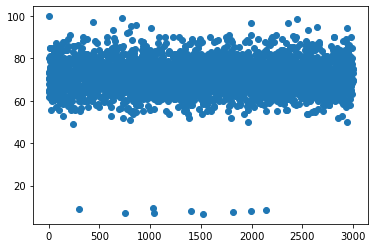

In [179]:
plt.scatter(df.index,df['collegeGPA']);

The values mostly lie in 50–100 range and we can safely drop values less than 20 which can introduce unnecessary bias.

In [180]:
df = df[(df['collegeGPA'] > 40)]

A few other feautures that looked weird in analysis:

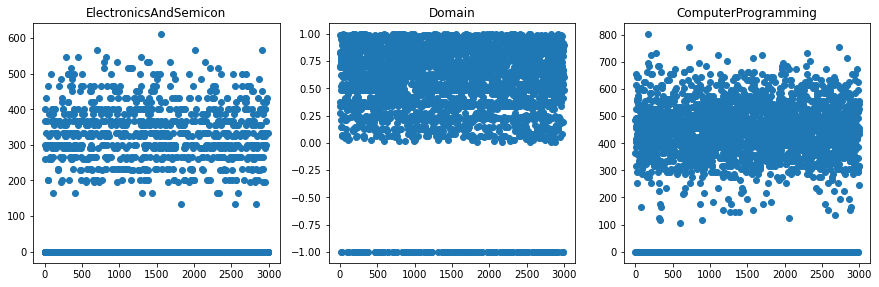

In [181]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
plt.scatter(df.index, df.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')
plt.subplot(3,3,2)
plt.scatter(df.index, df.Domain)
plt.title('Domain')
plt.subplot(3,3,3)
plt.scatter(df.index, df.ComputerProgramming)
plt.title('ComputerProgramming')
plt.show()

Remove unnecessary data:

In [182]:
df = df.replace(-1,np.nan)
cols_with_nan = [col for col in df.columns if df.isna().sum()[col]>0]
for col in cols_with_nan:
    df[col] = df[col].fillna(df[col].mean())

Look at a concise summary of the dataframe. Shows Dtypes:

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989 entries, 0 to 2997
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2989 non-null   object 
 1   10percentage           2989 non-null   float64
 2   12percentage           2989 non-null   float64
 3   CollegeTier            2989 non-null   int64  
 4   Degree                 2989 non-null   object 
 5   Specialization         2989 non-null   object 
 6   collegeGPA             2989 non-null   float64
 7   English                2989 non-null   int64  
 8   Logical                2989 non-null   int64  
 9   Quant                  2989 non-null   int64  
 10  Domain                 2989 non-null   float64
 11  ComputerProgramming    2989 non-null   float64
 12  ElectronicsAndSemicon  2989 non-null   float64
 13  ComputerScience        2989 non-null   float64
 14  MechanicalEngg         2989 non-null   float64
 15  Elec

Turn these objects into integers for modeling:

In [184]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)

Look at correlation heatmap:

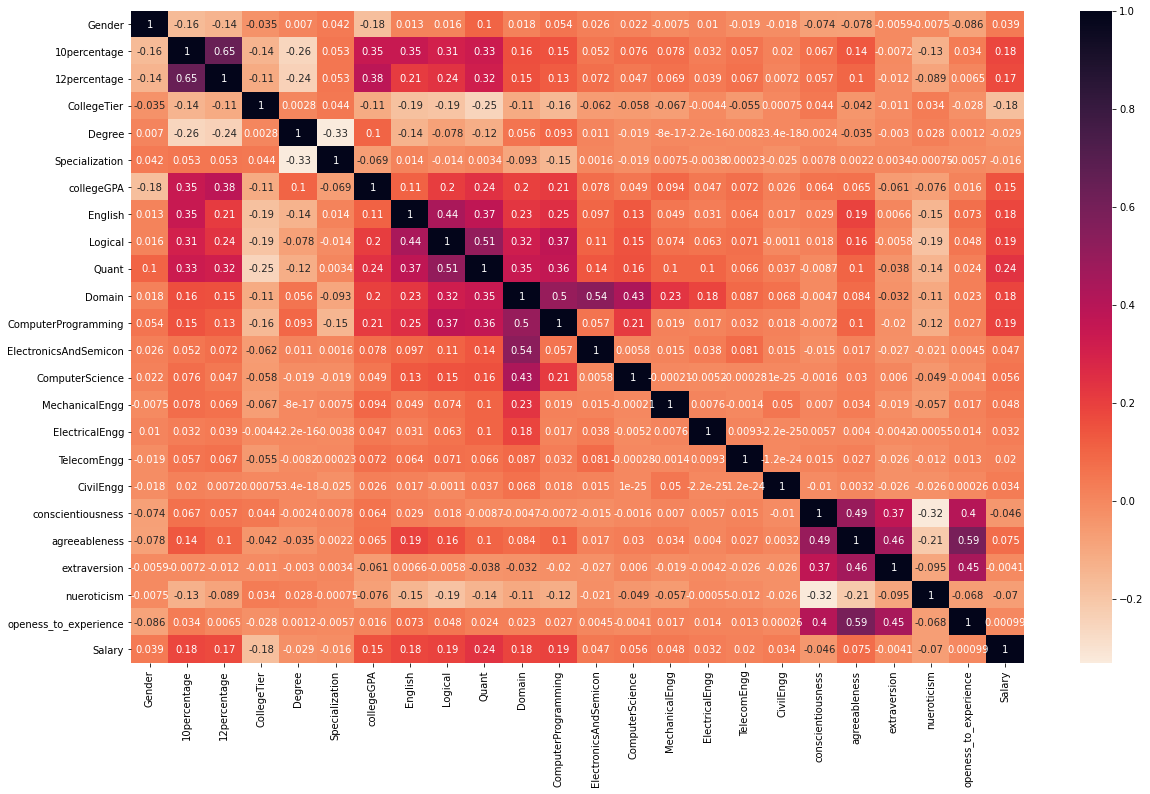

In [185]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='rocket_r')
plt.show()

Look at distribution of Gender versus Salary:

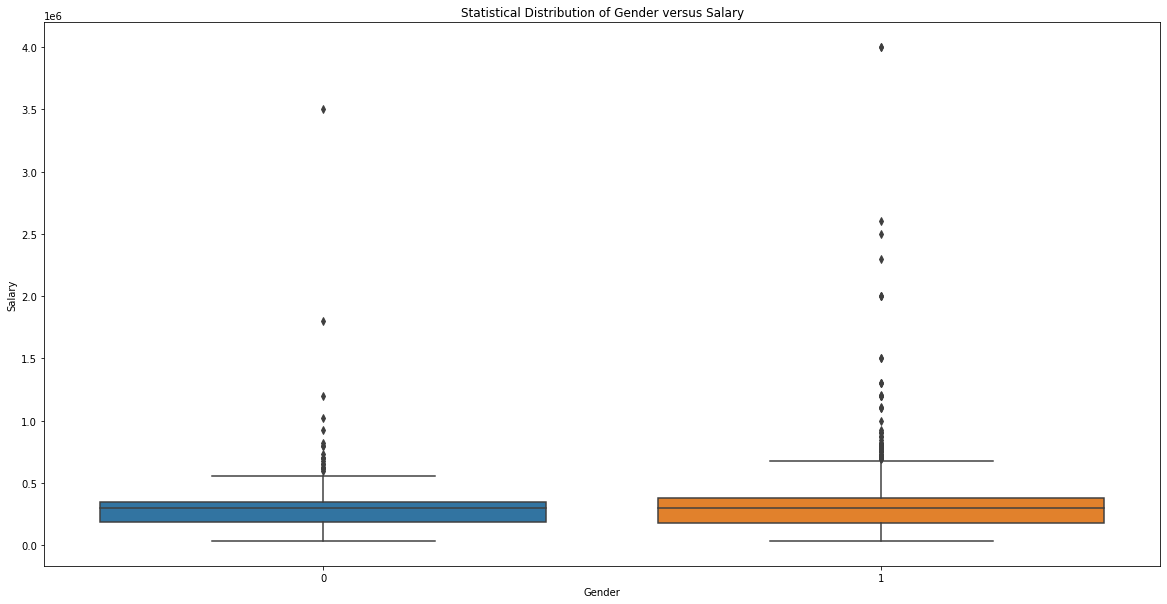

In [186]:
plt.figure(figsize=(20,10))
sns.boxplot( x=df['Gender'], y=df['Salary'] )

plt.title('Statistical Distribution of Gender versus Salary')
plt.show()

Extra Work: (Couldn't do all this EDA and not model)

Split df into dependent(y) and indepedent variables(X)

In [187]:
X = df.drop('Salary',axis=1)
y = df['Salary']

Train Test Split: 

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Standard Scale Train and Test Data:

In [189]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Use Linear Regression to determine Salary based off of other features:

In [190]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear_reg = linear_reg.predict(X_test)
linear_reg_r2_score = linear_reg.score(X_test, y_test)

Look at R^2 Score of Model:

In [191]:
print("Linear Regression R^2 Score: {:.4f}".format(linear_reg_r2_score))

Linear Regression R^2 Score: 0.1130


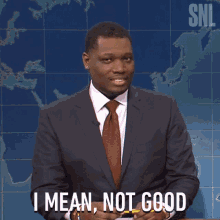

In [192]:
display.Image("i-mean-not-good-michael-che.gif" )

I'm not necessarily proud of the Linear Regression R^2 Score of 0.1130. I was able to clean up and analyze the data successfully and with more tuning and different models, I'm sure you could produce a better score.  